In [1]:
!pip install keras==2.2.4
!pip install -q pydot
!pip install graphviz
!apt-get install graphviz
from keras.utils.vis_utils import plot_model
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install tensorflow==1.15.0
import os
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from gensim.models import Word2Vec
from gensim import models
from gensim.models.keyedvectors import KeyedVectors
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import re
import csv
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


Using TensorFlow backend.


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-1qj3ar6u
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-1qj3ar6u
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101066 sha256=629c1fe1909bcee50ad1a6f9ee65eaccdfe0101411a543d32055b002be6e7c83
  Stored in directory: /tmp/pip-ephem-wheel-cache-6h3o2fhm/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [2]:
from tqdm import tqdm, trange
from google.colab import files
uploaded = files.upload()

data_raw = pd.read_csv("data.csv")

print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")

data_raw.head()

Saving data.csv to data.csv
Number of rows in data = 4982
Number of columns in data = 11


**Sample data:**


,chosen_emotion,text_long,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,Sadness,It is less an much an issue of how it affects ...,3,5,5,3,7,7,2,4,5
1,Anxiety,I am concerned that the true impact of the cur...,8,6,7,7,8,6,4,3,1
2,Relaxation,"Personally, I am fairly calm about the corona ...",4,1,1,2,2,4,7,7,2
3,Relaxation,In this very moment as I am fortunate to be ab...,6,4,2,3,4,1,6,7,3
4,Anxiety,I am more worried about getting access to my n...,6,2,2,5,5,5,4,4,4


In [3]:
#One hot encoding for all labels
data_raw
j=0
for i in data_raw.iterrows():
    if data_raw.worry[j]>=5:
        data_raw.worry[j]=1
    else:
        data_raw.worry[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.anger[j]>=5:
        data_raw.anger[j]=1
    else:
        data_raw.anger[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.anxiety[j]>=5:
        data_raw.anxiety[j]=1
    else:
        data_raw.anxiety[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.sadness[j]>=5:
        data_raw.sadness[j]=1
    else:
        data_raw.sadness[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.desire[j]>=5:
        data_raw.desire[j]=1
    else:
        data_raw.desire[j]=0
    j=j+1

j=0
for i in data_raw.iterrows():
    if data_raw.disgust[j]>=5:
        data_raw.disgust[j]=1
    else:
        data_raw.disgust[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.fear[j]>=5:
        data_raw.fear[j]=1
    else:
        data_raw.fear[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.happiness[j]>=5:
        data_raw.happiness[j]=1
    else:
        data_raw.happiness[j]=0
    j=j+1
j=0
for i in data_raw.iterrows():
    if data_raw.relaxation[j]>=5:
        data_raw.relaxation[j]=1
    else:
        data_raw.relaxation[j]=0
    j=j+1


        

data_raw


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 


,chosen_emotion,text_long,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,Sadness,It is less an much an issue of how it affects ...,0,1,1,0,1,1,0,0,1
1,Anxiety,I am concerned that the true impact of the cur...,1,1,1,1,1,1,0,0,0
2,Relaxation,"Personally, I am fairly calm about the corona ...",0,0,0,0,0,0,1,1,0
3,Relaxation,In this very moment as I am fortunate to be ab...,1,0,0,0,0,0,1,1,0
4,Anxiety,I am more worried about getting access to my n...,1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4977,Desire,Dont worry about it everyone we are nearing th...,0,0,0,0,0,0,1,1,1
4978,Fear,Wish you a speedy recovery Boris,1,0,1,1,1,1,0,0,0
4979,Fear,Please stay home to keep us all alive,1,1,1,1,1,1,0,0,0
4980,Anxiety,There are people who still believe it is okay ...,1,0,1,1,1,1,0,1,1


In [4]:

MAX_SEQUENCE_LENGTH=50
data_raw.shape


(4982, 11)

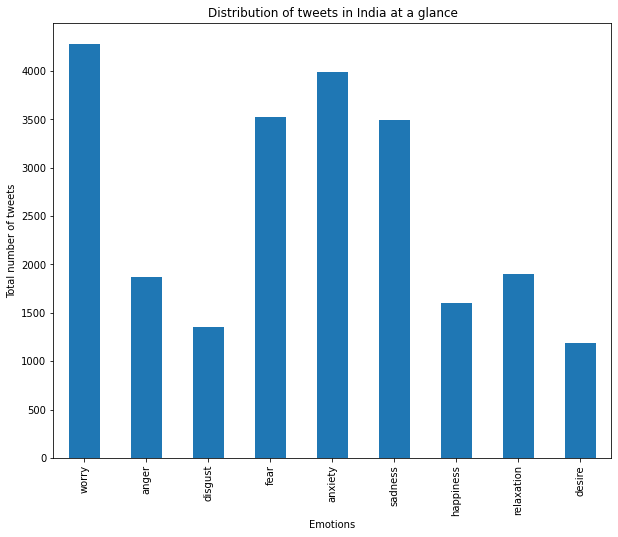

In [5]:
emotion_labels=data_raw[['worry','anger','disgust','fear','anxiety','sadness','happiness','relaxation','desire']]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Emotions')
plt.ylabel('Total number of tweets')
plt.title('Distribution of tweets in India at a glance')

emotion_labels.sum(axis=0).plot.bar()


In [6]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [7]:
def preprocess_text(sen): 
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
data_raw['Text_Clean'] = data_raw['text_long'].apply(lambda x: preprocess_text(x))


import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize, WordNetLemmatizer


tokens = [word_tokenize(sen) for sen in data_raw.Text_Clean]
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] 


from nltk.corpus import stopwords
stoplist = stopwords.words('english')

def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]

filtered_words = [remove_stop_words(sen) for sen in lower_tokens] 
result = [' '.join(sen) for sen in filtered_words]
data_raw['Text_Final'] = result
data_raw['tokens'] = filtered_words
data_raw=data_raw[['Text_Final', 'tokens','worry','anger','disgust','fear','anxiety','sadness','happiness','relaxation','desire']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data_raw

,Text_Final,tokens,worry,anger,disgust,fear,anxiety,sadness,happiness,relaxation,desire
0,less much issue affects illness low hospitaliz...,"[less, much, issue, affects, illness, low, hos...",0,1,1,0,1,1,0,0,1
1,concerned true impact current situation fully ...,"[concerned, true, impact, current, situation, ...",1,1,1,1,1,1,0,0,0
2,personally fairly calm corona virus situation ...,"[personally, fairly, calm, corona, virus, situ...",0,0,0,0,0,0,1,1,0
3,moment fortunate able work home feel comfortab...,"[moment, fortunate, able, work, home, feel, co...",1,0,0,0,0,0,1,1,0
4,worried getting access normal healthcare momen...,"[worried, getting, access, normal, healthcare,...",1,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4977,dont worry everyone nearing light end tunnel l...,"[dont, worry, everyone, nearing, light, end, t...",0,0,0,0,0,0,1,1,1
4978,wish speedy recovery boris,"[wish, speedy, recovery, boris]",1,0,1,1,1,1,0,0,0
4979,please stay home keep us alive,"[please, stay, home, keep, us, alive]",1,1,1,1,1,1,0,0,0
4980,people still believe okay leave outside even s...,"[people, still, believe, okay, leave, outside,...",1,0,1,1,1,1,0,1,1


In [9]:
!pip install -U sentence-transformers
sentences= data_raw.Text_Final.values.tolist()
from sentence_transformers import SentenceTransformer
vec = SentenceTransformer('bert-base-nli-mean-tokens')


Requirement already up-to-date: sentence-transformers in /usr/local/lib/python3.6/dist-packages (0.4.1.2)


In [10]:
data_train, data_test = train_test_split(data_raw, test_size=0.20, random_state=42)
data_raw['Text_Final']

0       less much issue affects illness low hospitaliz...
1       concerned true impact current situation fully ...
2       personally fairly calm corona virus situation ...
3       moment fortunate able work home feel comfortab...
4       worried getting access normal healthcare momen...
                              ...                        
4977    dont worry everyone nearing light end tunnel l...
4978                           wish speedy recovery boris
4979                       please stay home keep us alive
4980    people still believe okay leave outside even s...
4981                                                worst
Name: Text_Final, Length: 4982, dtype: object

In [11]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

129468 words total, with a vocabulary size of 8306
Max sentence length is 456


In [12]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

33855 words total, with a vocabulary size of 4494
Max sentence length is 216


In [13]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 768

In [14]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))


Found 8306 unique tokens.


In [15]:
num_words = len(train_word_index)
train_rnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
len(training_sequences)


3985

In [16]:
train_word_index

{'people': 1,
 'feel': 2,
 'family': 3,
 'worried': 4,
 'situation': 5,
 'also': 6,
 'home': 7,
 'time': 8,
 'virus': 9,
 'anxious': 10,
 'get': 11,
 'go': 12,
 'stay': 13,
 'going': 14,
 'work': 15,
 'government': 16,
 'like': 17,
 'friends': 18,
 'health': 19,
 'see': 20,
 'think': 21,
 'sad': 22,
 'lockdown': 23,
 'everyone': 24,
 'things': 25,
 'life': 26,
 'know': 27,
 'much': 28,
 'still': 29,
 'feeling': 30,
 'able': 31,
 'many': 32,
 'would': 33,
 'future': 34,
 'worry': 35,
 'nhs': 36,
 'day': 37,
 'long': 38,
 'back': 39,
 'us': 40,
 'really': 41,
 'scared': 42,
 'normal': 43,
 'anxiety': 44,
 'angry': 45,
 'need': 46,
 'hope': 47,
 'lives': 48,
 'rules': 49,
 'world': 50,
 'concerned': 51,
 'safe': 52,
 'coronavirus': 53,
 'risk': 54,
 'getting': 55,
 'want': 56,
 'corona': 57,
 'social': 58,
 'others': 59,
 'one': 60,
 'moment': 61,
 'could': 62,
 'keep': 63,
 'lot': 64,
 'job': 65,
 'end': 66,
 'fear': 67,
 'even': 68,
 'take': 69,
 'help': 70,
 'may': 71,
 'well': 72,
 'w

In [17]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    
    train_embedding_weights[index,:] = vec.encode(word)
print(train_embedding_weights.shape)


(8307, 768)


In [18]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_rnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
data_test.shape

(997, 11)

In [19]:
label_names = ['worry','anger','disgust','fear','anxiety','sadness','happiness','relaxation','desire']

In [20]:
y_train = data_train[label_names].values

In [21]:
x_train = train_rnn_data
y_tr = y_train
x_train.shape

(3985, 50)

In [22]:
x_test = test_rnn_data 
y_test = data_test[label_names].values
y_test.shape

(997, 9)

In [23]:
n_classes = len(list(label_names))

In [24]:
model = Sequential()
# Configuring the parameters
model.add(Embedding(num_words+1,
                            EMBEDDING_DIM,
                            weights=[train_embedding_weights],
                            #input_length=max_sequence_length+256,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model.add(LSTM(128, return_sequences=True))  
# Adding a dropout layer
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 768)           6379776   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 128)           459264    
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
Total params: 6,8

In [25]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

earlyStopping = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='max',restore_best_weights=True)
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='max')

history = model.fit(x_train, y_tr,
                    class_weight='balanced',
                    epochs=100,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

model.save("Sentiment.h5")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '




Train on 3586 samples, validate on 399 samples
Epoch 1/100
3586/3586 [==============================] - 6s 2ms/step - loss: 0.6071 - acc: 0.6926 - val_loss: 0.5774 - val_acc: 0.7224
Epoch 2/100
3586/3586 [==============================] - 4s 1ms/step - loss: 0.5937 - acc: 0.7123 - val_loss: 0.5747 - val_acc: 0.7224
Epoch 3/100
3586/3586 [==============================] - 4s 1ms/step - loss: 0.5904 - acc: 0.7144 - val_loss: 0.5738 - val_acc: 0.7224
Epoch 4/100
3586/3586 [==============================] - 4s 1ms/step - loss: 0.5885 - acc: 0.7147 - val_loss: 0.5712 - val_acc: 0.7224
Epoch 5/100
3586/3586 [==============================] - 4s 1ms/step - loss: 0.5800 - acc: 0.7152 - val_loss: 0.5709 - val_acc: 0.7210
Epoch 6/100
3586/3586 [==============================] - 4s 1ms/step - loss: 0.5756 - acc: 0.7173 - val_loss: 0.5640 - val_acc: 0.7224
Epoch 7/100
3586/3586 [==============================] - 4s 1ms/step - loss: 0.5701 - acc: 0.7188 - val_loss: 0.5634 - val_acc: 0.7246
Epoch 

In [27]:
!pip install seqeval
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [30]:
predictions=model.predict([x_test])
thresholds=[0.5]
for val in thresholds:
    pred=predictions.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
  
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    f1 = f1_score(y_test, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.7715, Recall: 0.6792, F1-measure: 0.7224


In [31]:
score = model.evaluate(x_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

997/997 [==============================] - 2s 2ms/step
Test Score: 0.55065112116344
Test Accuracy: 0.7307478029247273


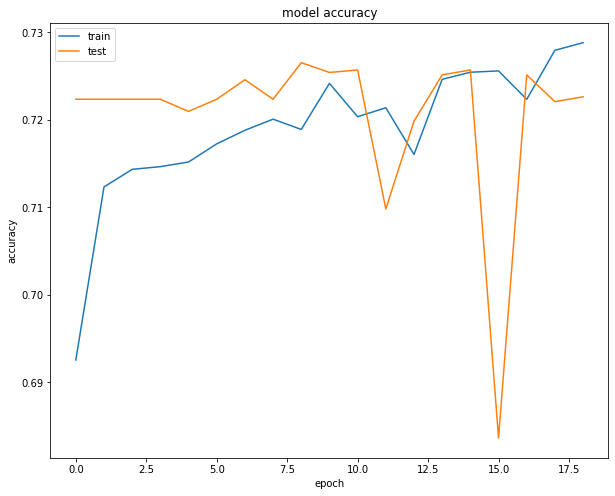

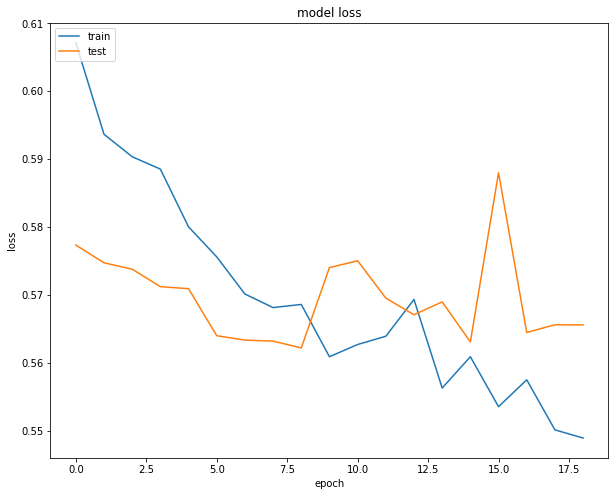

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()